# Mexico Covid-19 

In this project I analyze the behavior of positive cases of Covid19 through a regression model.

## Loading Dataset

In [48]:
import pandas as pd
import numpy as np

The dataset is avaible on https://covid19.sinave.gob.mx/

In [49]:
data=pd.read_csv('COV19_GraficaCasosEstimados.csv')

In [50]:
pd.set_option("display.max.columns", None)

In [51]:
data.head()

,semana,estado,negativos,confirmados,sospe_con_cal,sospe_sin_cal,sospe_sin_muestra,positividad
0,2020-1,NACIONAL,475,0,0,73,466,0
1,2020-2,NACIONAL,1111,0,0,117,1106,0
2,2020-3,NACIONAL,1352,6,0,92,1574,0
3,2020-4,NACIONAL,1566,7,0,128,1641,0
4,2020-5,NACIONAL,1291,5,0,112,1550,0


In [52]:
data.shape

(58, 8)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   semana             58 non-null     object
 1   estado             58 non-null     object
 2   negativos          58 non-null     int64 
 3   confirmados        58 non-null     int64 
 4   sospe_con_cal      58 non-null     int64 
 5   sospe_sin_cal      58 non-null     int64 
 6   sospe_sin_muestra  58 non-null     int64 
 7   positividad        58 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.8+ KB


## Cleaning and Visualizing Data

In [54]:
weeks=np.arange(data.shape[0]) #let's create a list with the numbers of all 'covid-weeks' at moment

In [55]:
weeks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57])

In [56]:
df=pd.DataFrame({'weeks':weeks,'positives':data.confirmados})

In [57]:
df.tail()

,weeks,positives
53,53,105841
54,54,103639
55,55,89916
56,56,65380
57,57,50310


<AxesSubplot:xlabel='weeks', ylabel='positives'>

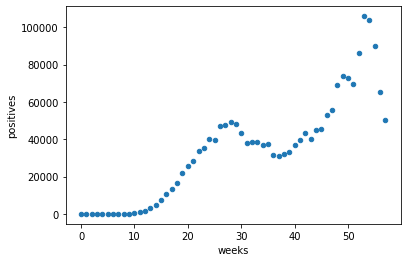

In [58]:
df.plot.scatter(x='weeks',y='positives')

<AxesSubplot:xlabel='weeks'>

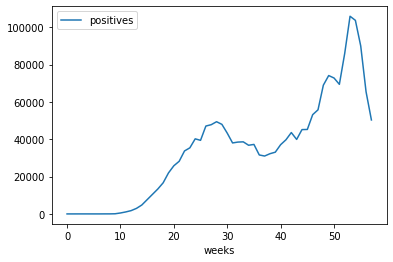

In [59]:
# This is how actually looks the oficial graph of the goverment

df.plot(x='weeks',y='positives')

In [60]:
# Normalizing Positive cases since there are hugh differences of values between weeks

X=df.positives.values # Returns a numpy array

In [61]:
type(X)

numpy.ndarray

In [62]:
X=X.reshape((58,1))

In [63]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [64]:
X_scaled.max(),X_scaled.min(),X_scaled.mean()

(1.0, 0.0, 0.322841288608254)

In [65]:
import matplotlib.pyplot as plt 
%matplotlib inline

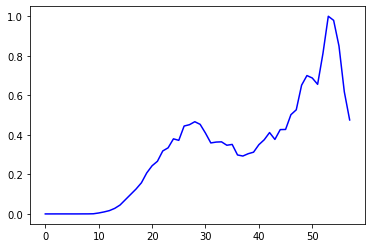

In [66]:
plt.plot(weeks, X_scaled, color = 'blue') # Ok, nothing changes, but our data is normalized
plt.show()

## Creating a regression model that explains the evolution of Covid-19 in Mexico

In [70]:
X_scaled.shape,weeks.shape

((58, 1), (58,))

In [72]:
type(X_scaled),type(weeks)

(numpy.ndarray, numpy.ndarray)

In [73]:
# Fitting Linear Regression to the dataset 
# (it's easy to see that for this problem a linear function it's not useful)
# but remenber that even a hugh degree regression function is linear in terms 
# of unknown variables, hence these models are linear from the point of estimation.

from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
lin.fit(X_scaled,weeks)

LinearRegression()

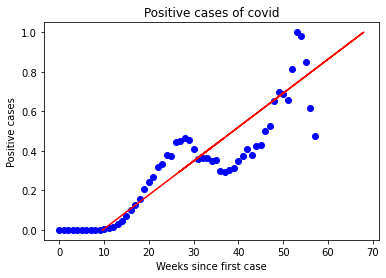

In [76]:
# Visualising the Linear Regression results 

plt.scatter(weeks, X_scaled, color = 'blue') 
  
plt.plot(lin.predict(X_scaled), X_scaled , color = 'red') 
plt.title('Positive cases of covid') 
plt.xlabel('Weeks since first case') 
plt.ylabel('Positive cases') 
plt.show() 

In [100]:
# Fitting Polynomial Regression to the dataset 

from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 10) 
X_poly = poly.fit_transform(X_scaled) 
  
poly.fit(X_poly, weeks) 
lin2 = LinearRegression() 
lin2.fit(X_poly, weeks) 

LinearRegression()

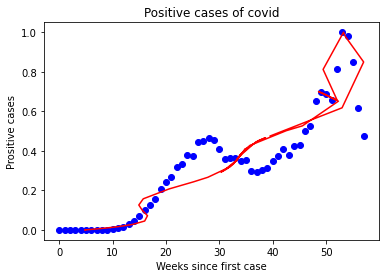

In [101]:
# Visualising the Polynomial Regression results 
plt.scatter(weeks, X_scaled, color = 'blue') 
  
plt.plot(lin2.predict(poly.fit_transform(X_scaled)), X_scaled, color = 'red') 
plt.title('Positive cases of covid') 
plt.xlabel('Weeks since first case') 
plt.ylabel('Prositive cases') 
plt.show() 

Even a polynomia